       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just realized that my Mac window partiti

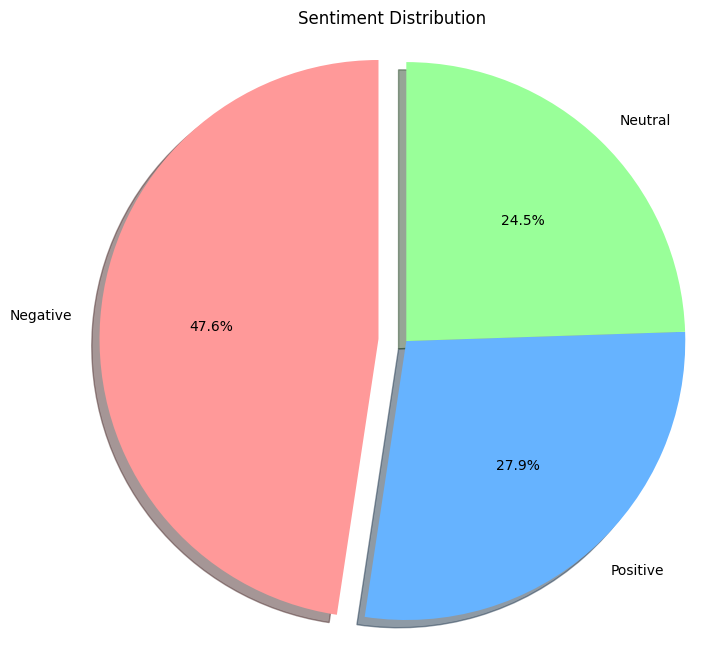

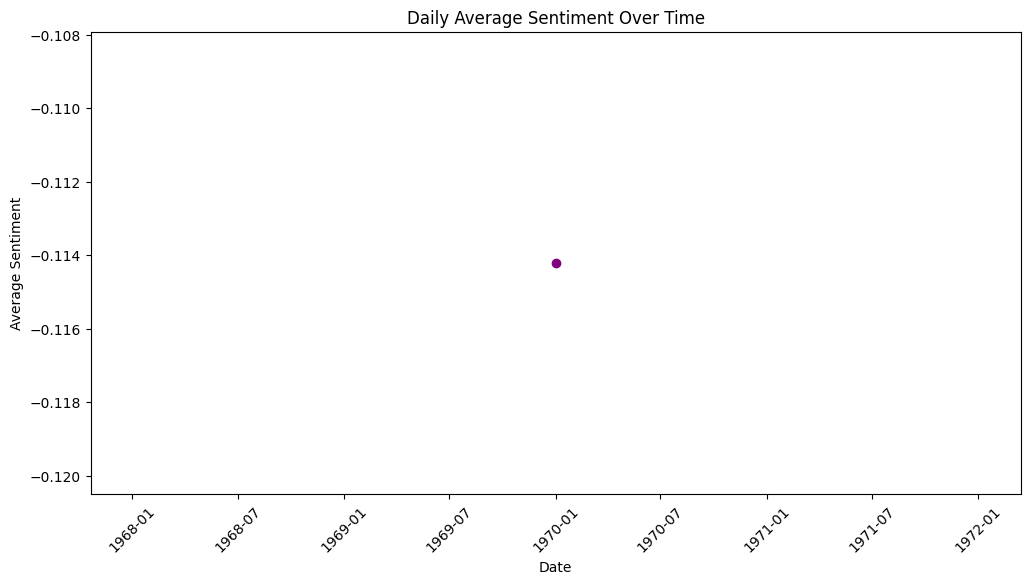

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np

data=pd.read_csv('/home/rguktong/Desktop/twitter_training.csv')
print(data)
# Check the shape of the dataset
print(data.shape)

# Display column names and types
print(data.info())

# Check for missing values
print(data.isnull().sum())
# Handle missing values
data = data.dropna()  # Or you can fill missing values as appropriate
print(data.columns)
# Check sentiment distribution
print(data['im getting on borderlands and i will murder you all ,'].value_counts())

# Set the style of the visualization
#sns.set(style='whitegrid')

# Visualize the sentiment distribution

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the tweet text column
data['im getting on borderlands and i will murder you all ,'] = data['Positive'].apply(get_sentiment)

# Categorize sentiment
data['sentiment_category'] = np.where(data['im getting on borderlands and i will murder you all ,'] > 0, 'Positive', 
                                       np.where(data['im getting on borderlands and i will murder you all ,'] < 0, 'Negative', 'Neutral'))

sentiment_counts = data['sentiment_category'].value_counts()

# Define colors for gradient based on sentiment categories
colors = ['#FF9999', '#66B3FF', '#99FF99']  # Red for Negative, Blue for Neutral, Green for Positive

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, startangle=90, 
        autopct='%1.1f%%', shadow=True, explode=(0.1, 0, 0))  # explode the first slice
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Convert timestamp to datetime
data['2401'] = pd.to_datetime(data['2401'])

# Group by date and calculate mean sentiment
daily_sentiment = data.groupby(data['2401'].dt.date)['im getting on borderlands and i will murder you all ,'].mean().reset_index()

# Plot daily sentiment
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment['2401'], daily_sentiment['im getting on borderlands and i will murder you all ,'], marker='o', color='purple')
plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)

plt.show()
